In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Realestate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.drop('No', axis=1, inplace=True)

In [5]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.columns = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longitude', 'HousePricePerUnit']
df.head()

,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
'''
DOG
Attributes:
4 limbs
1 tail
2 eyes
Methods:
bark()
eat(food)
run()

 '''

' \nDOG\nAttributes:\n4 limbs\n1 tail\n2 eyes\nMethods:\nbark()\neat(food)\nrun()\n\n '

In [8]:
# Are there any monthly seasonal patterns in the house price


In [9]:
df['TransactionDate']

,TransactionDate
0,2012.917
1,2012.917
2,2013.583
3,2013.500
4,2012.833
...,...
409,2013.000
410,2012.667
411,2013.250
412,2013.000


In [10]:
df['TransactionMonth'] = df['TransactionDate'].astype(str).str.split('.').str[1].astype(int)

In [11]:
df.head()

,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833


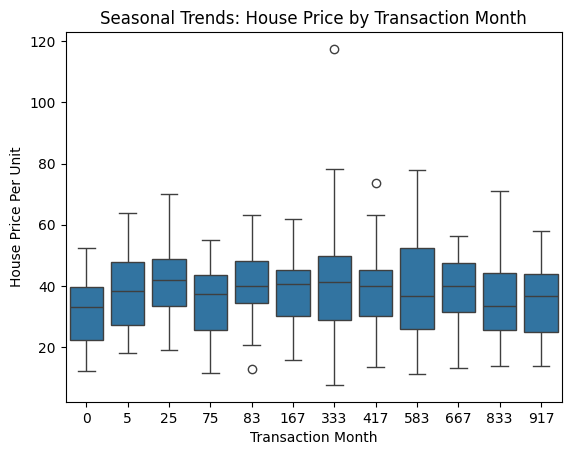

In [12]:
sns.boxplot(data=df, x='TransactionMonth', y='HousePricePerUnit')
plt.title("Seasonal Trends: House Price by Transaction Month")
plt.xlabel('Transaction Month')
plt.ylabel('House Price Per Unit')
plt.show()

In [13]:
monthly_avg = df.groupby('TransactionMonth')['HousePricePerUnit'].mean()
print("Avg house price per month is ", monthly_avg)

Avg house price per month is  TransactionMonth
0      31.057143
5      38.119149
25     41.293750
75     35.581481
83     40.493478
167    38.304000
333    41.562069
417    38.453448
583    39.604348
667    38.543333
833    35.683871
917    35.557895
Name: HousePricePerUnit, dtype: float64


In [14]:
#Working with actual month names

# Step 1: Convert fractional year to datetime

import datetime

def fractional_year_to_date(fractional_year):
  year = int(fractional_year)
  rem = fractional_year - year
  base = datetime.datetime(year, 1, 1)
  result_date = base + datetime.timedelta(days=rem*365)
  return result_date

df['TransactionDateTime'] = df['TransactionDate'].apply(fractional_year_to_date)

df['TransactionMonthName'] = df['TransactionDateTime'].dt.strftime('%B')
df['TransactionMonth'] = df['TransactionDateTime'].dt.month

In [15]:
df.head()

,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth,TransactionDateTime,TransactionMonthName
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012-11-30 16:55:11.999997,November
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012-11-30 16:55:11.999997,November
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,8,2013-08-01 19:04:48.000003,August
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,7,2013-07-02 12:00:00.000000,July
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012-10-31 01:04:48.000003,October


In [16]:
monthly_avg_name = df.groupby('TransactionMonthName')['HousePricePerUnit'].mean()
print(monthly_avg_name)

TransactionMonthName
April        41.293750
August       39.003774
January      36.922973
July         38.119149
June         38.453448
March        38.304000
May          41.562069
November     35.557895
October      35.683871
September    35.581481
Name: HousePricePerUnit, dtype: float64


In [ ]:
#Sort the above output month wise using calender library
#Boxplot with month names